In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv")
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'species': ['Adelie' 'Chinstrap' 'Gentoo']
Unique values in 'island': ['Torgersen' 'Biscoe' 'Dream']
Unique values in 'sex': ['MALE' 'FEMALE' nan '.']


In [6]:
len(df[df['sex'] == "."])

1

In [7]:
len(df[df.isnull().any(axis=1)]) / len(df) * 100

2.9069767441860463

In [8]:
df = df.dropna()

In [9]:
df = df[df['sex'] != "."]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [10]:
import warnings
warnings.filterwarnings('ignore')

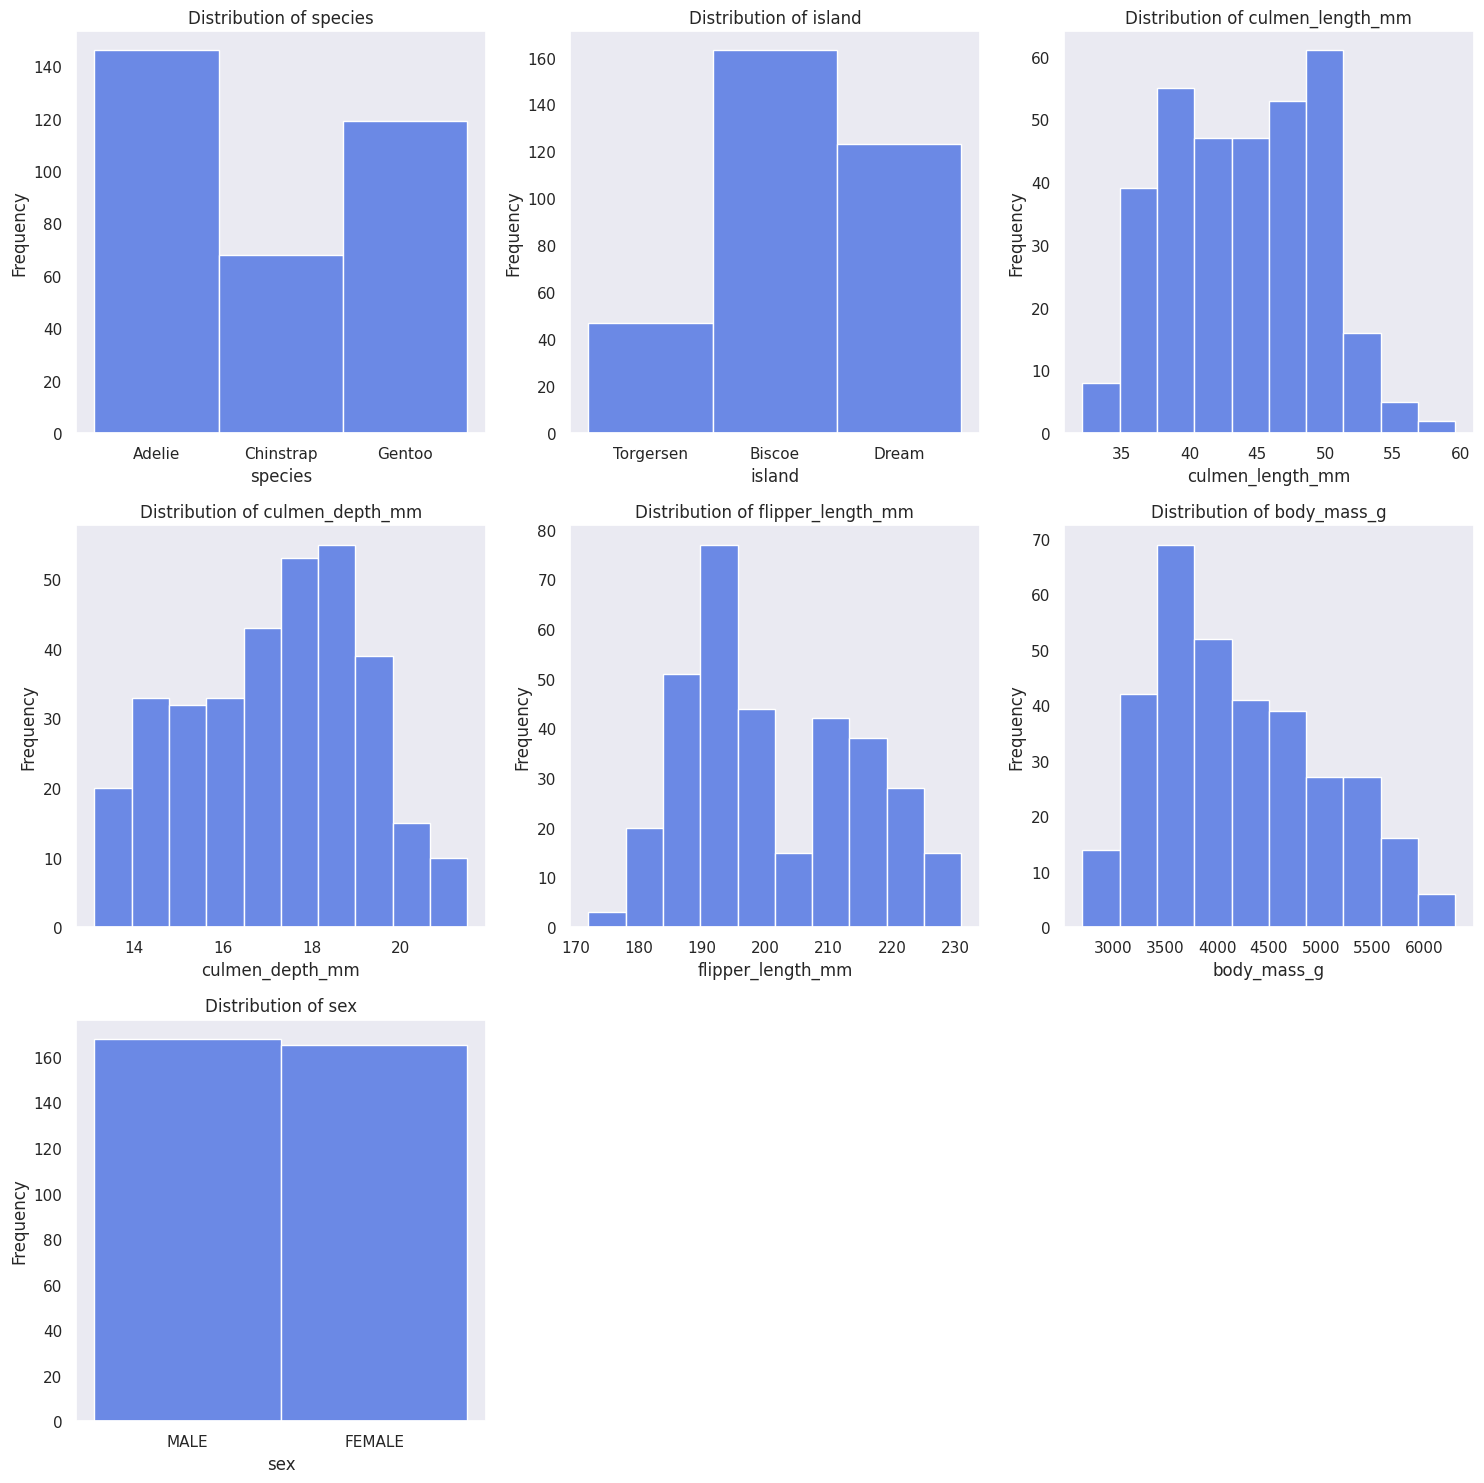

In [11]:
sns.set_theme(style="dark")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(data=df[column], bins=10, color='royalblue', ax=axes[i]) 
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])  

plt.tight_layout()

Text(0.5, 1.0, 'Distribution of Island, by Species')

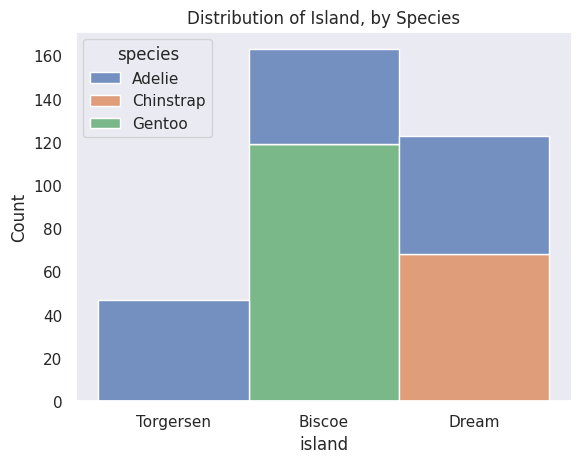

In [12]:
sns.histplot(data=df, x='island', hue='species', multiple="stack")
plt.title("Distribution of Island, by Species")

Text(0.5, 1.0, 'Distribution of Sex by Species')

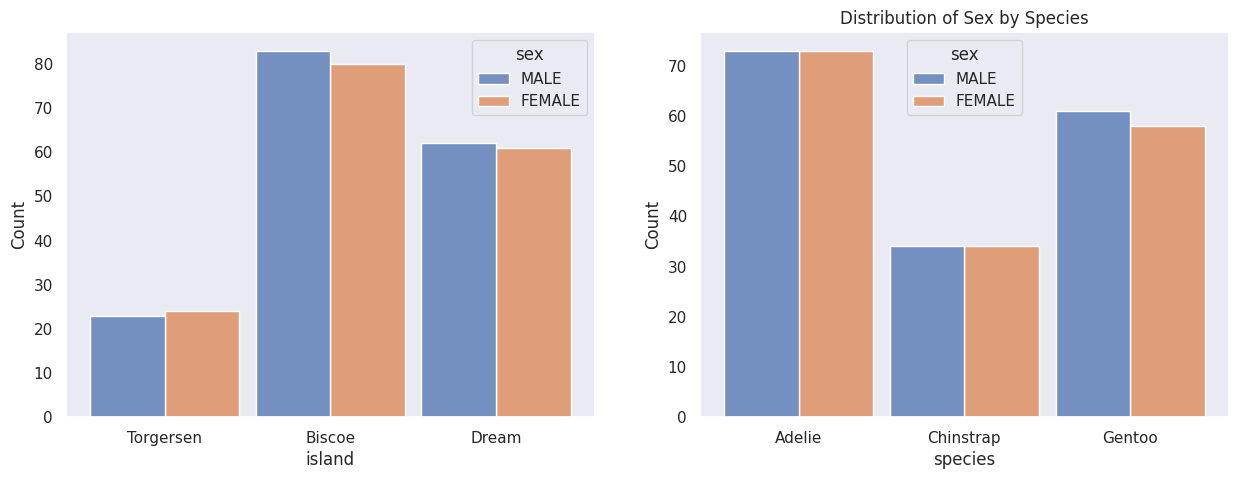

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.flatten()

sns.histplot(data=df, x='island', hue='sex', multiple="dodge", ax=axes[0], shrink=.9)
plt.title("Distribution of Island by Islands")
sns.histplot(data=df, x='species', hue='sex', multiple="dodge", ax=axes[1], shrink=.9)
plt.title("Distribution of Sex by Species")

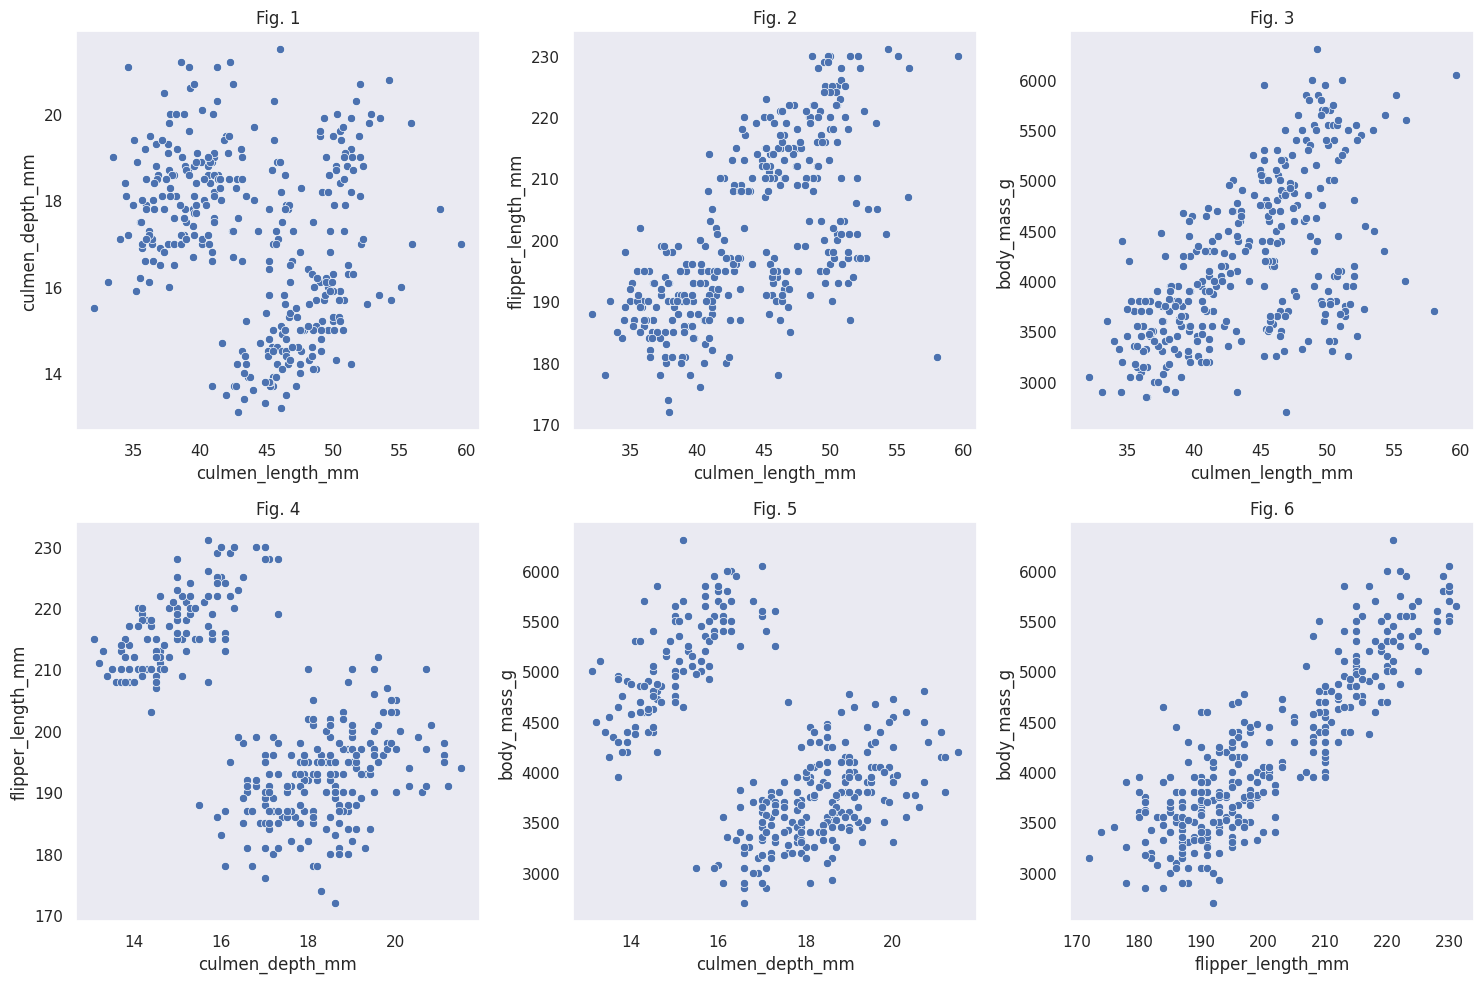

In [14]:
from itertools import combinations

numerical_columns = df.select_dtypes(include=['number']).columns
combinations_of_columns = combinations(numerical_columns, 2)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (col1, col2) in enumerate(combinations_of_columns):
    sns.scatterplot(data=df, x=col1, y=col2, ax=axes[i])
    axes[i].set_title(f'Fig. {i+1}')
    axes[i].set_xlabel(col1)
    axes[i].set_ylabel(col2)

plt.tight_layout()

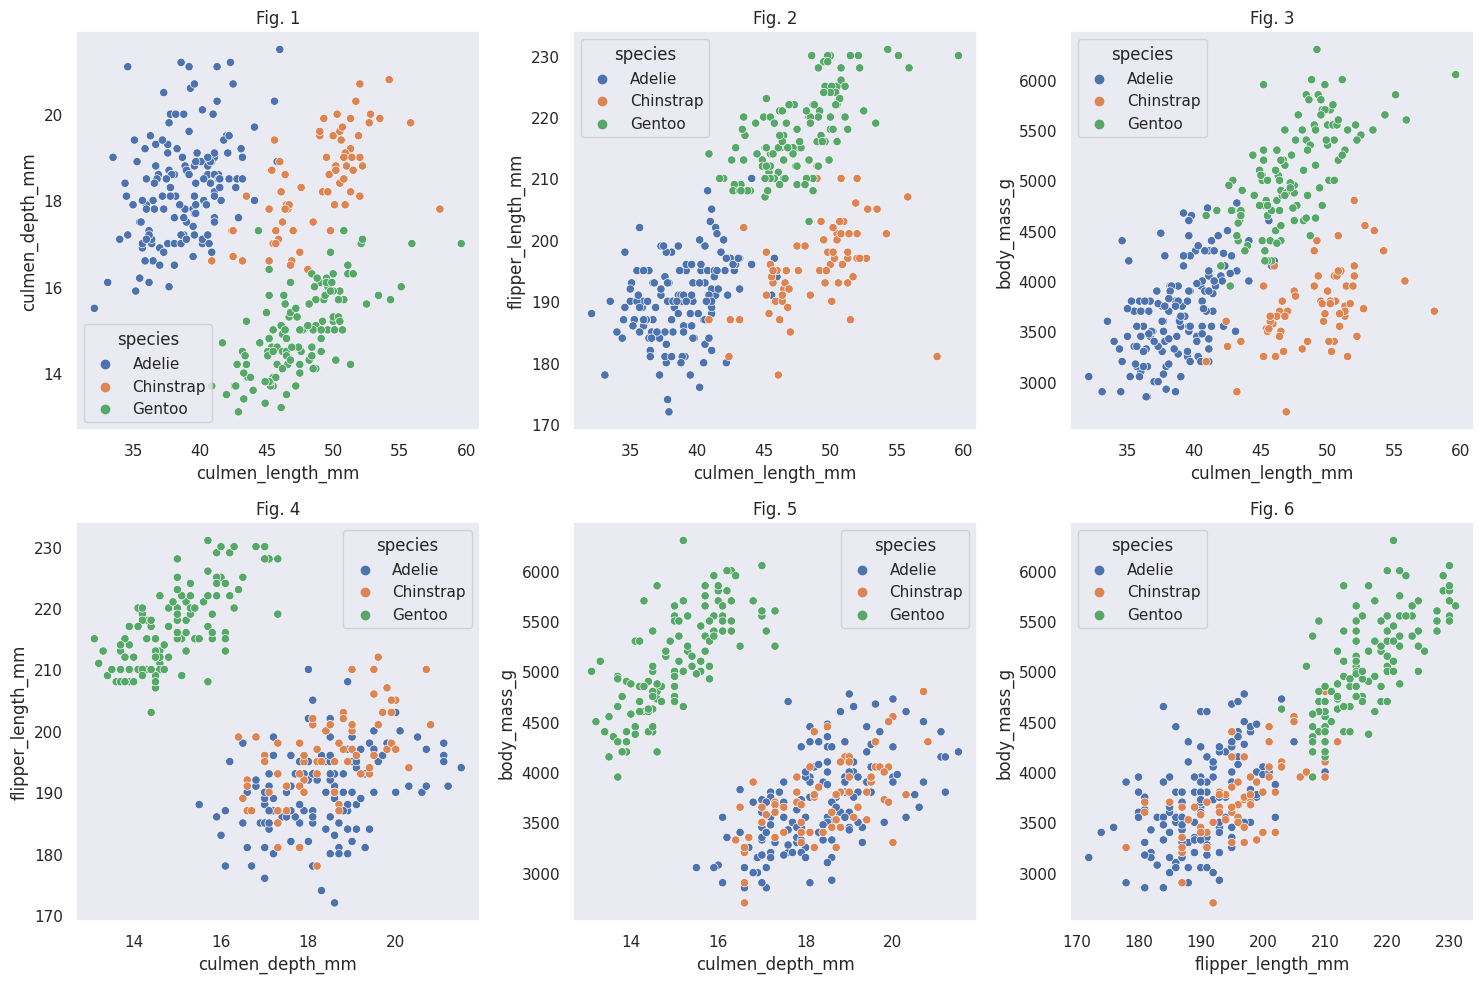

In [15]:
numerical_columns = df.select_dtypes(include=['number']).columns
combinations_of_columns = combinations(numerical_columns, 2)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (col1, col2) in enumerate(combinations_of_columns):
    sns.scatterplot(data=df, x=col1, y=col2, hue='species', ax=axes[i])
    axes[i].set_title(f'Fig. {i+1}')
    axes[i].set_xlabel(col1)
    axes[i].set_ylabel(col2)

plt.tight_layout()

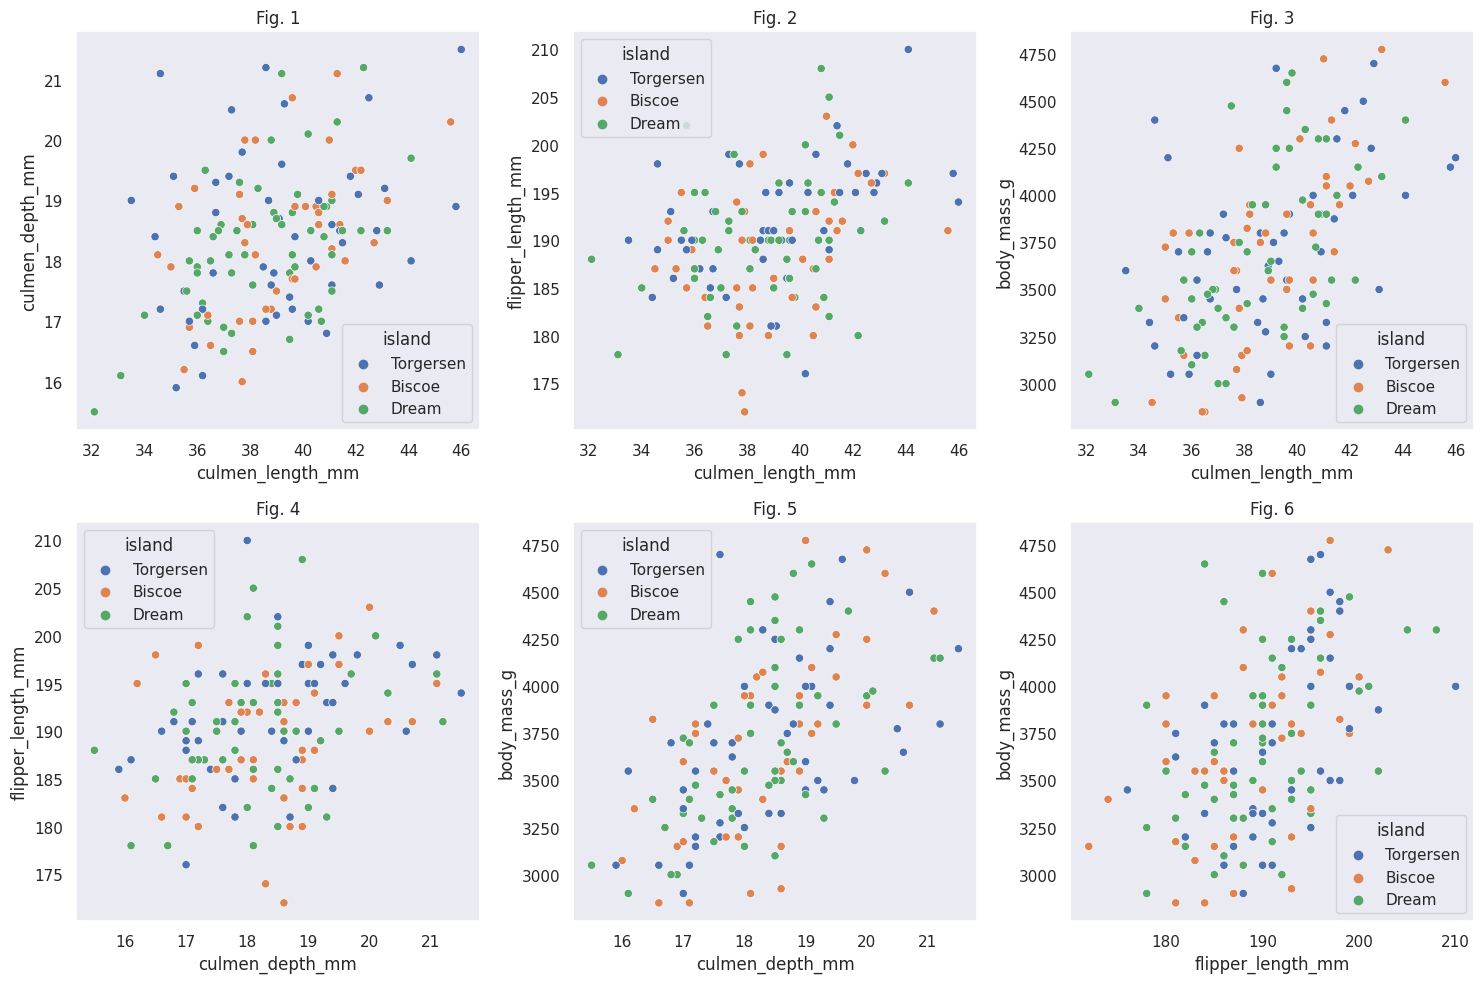

In [16]:
adelie_df = df[df['species'] == 'Adelie']

numerical_columns = adelie_df.select_dtypes(include=['number']).columns
combinations_of_columns = combinations(numerical_columns, 2)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (col1, col2) in enumerate(combinations_of_columns):
    sns.scatterplot(data=adelie_df, x=col1, y=col2, hue='island', ax=axes[i])
    axes[i].set_title(f'Fig. {i+1}')
    axes[i].set_xlabel(col1)
    axes[i].set_ylabel(col2)

plt.tight_layout()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df.drop(columns=['species'])
y = df['species']
X = pd.get_dummies(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test) 
accuracy_score(y_test, y_pred)

1.0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df.drop(columns=['species'])
y = df['species']
X = pd.get_dummies(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test) 
accuracy_score(y_test, y_pred)